In [60]:
import sklearn
import torch
import numpy as np
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt
from torch import nn, optim

In [61]:
class CustomLogisticRegression(nn.Module):
    def __init__(self, nclasses, bias=True):
        super().__init__()
        self.layer = nn.LazyLinear(nclasses,bias=bias)
    def fit(self,X,y,steps=100):
        X, y = self.to_torch(X), self.to_torch(y).long()
        opt = optim.Adam(self.parameters(),lr=.1)
        # losses = []
        for _ in range(steps):
            opt.zero_grad()
            res = self.layer(X)
            loss = nn.functional.cross_entropy(res,y)
            loss.backward()
            opt.step()
            # losses.append(loss.item())
        return self
    
    def to_torch(self,x):
        return torch.from_numpy(x).float()

    def predict(self,X):
        with torch.no_grad():
            y = self.layer.forward(self.to_torch(X)).softmax(-1).numpy()
        return y

c:\Users\PyCy\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


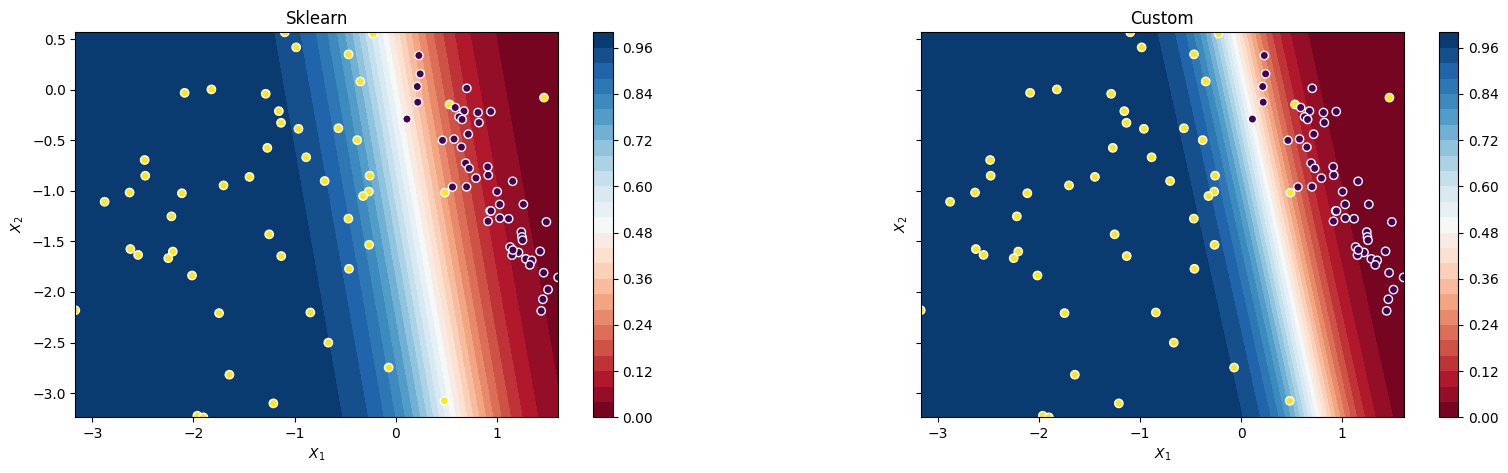

In [62]:
n_classes = 2
X, y = sklearn.datasets.make_classification(
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=n_classes,
    n_clusters_per_class=1,
    random_state=10,
)
ylim = X[:, 1].min(), X[:, 1].max()
xlim = X[:, 0].min(), X[:, 0].max()
xx, yy = np.mgrid[xlim[0]:xlim[1]:.01, ylim[0]:ylim[1]:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

def draw(probs, f, ax, title):
    contour = ax.contourf(xx, yy, probs, 30, cmap="RdBu")
    ax_c = f.colorbar(contour)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="white")
    ax.set(aspect="equal", xlim=xlim, ylim=ylim,
           xlabel="$X_1$", ylabel="$X_2$")
    ax.set_title(title)



model = sklearn.linear_model.LogisticRegression().fit(X, y)
custom = CustomLogisticRegression(n_classes,bias=True).fit(X, y,steps=100)

# take probabilities of a class
probs1 = model.predict_proba(grid)[:, 1].reshape(xx.shape)
probs2 = custom.predict(grid)[:, 1].reshape(xx.shape)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
draw(probs1,fig,ax1,"Sklearn")
draw(probs2,fig,ax2,"Custom")